In [36]:
if (!require(dplyr, quietly = TRUE)) {
  install.packages("dplyr")
}
if (!require(MASS, quietly = TRUE)) {
  install.packages("MASS")
}
if (!require(car, quietly = TRUE)) {
  install.packages("car")
}
if (!require(glmnet, quietly = TRUE)) {
  install.packages("glmnet")
}
library(glmnet)
library(dplyr)
library(MASS)
library(car)

In [37]:
getwd()

[1] "c:/Users/Ethan/Dropbox/!School/MGT 6203 - Data Analytics for Business/Team Project/repo/Code"

In [38]:
df <- read.csv("../Data/processed_salary_data.csv", check.names=FALSE)
head(df)

,age,industry,annual_salary,annual_bonus,state,overall_experience_years,field_experience_years,education_level,gender,race,date
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,25-34,Education (Higher Education),55000,0,Massachusetts,5 - 7 years,5 - 7 years,Master's degree,Woman,White,2021-04-27
2,25-34,"Accounting, Banking & Finance",34000,0,Tennessee,2 - 4 years,2 - 4 years,College degree,Woman,White,2021-04-27
3,25-34,Nonprofits,62000,3000,Wisconsin,8 - 10 years,5 - 7 years,College degree,Woman,White,2021-04-27
4,25-34,"Accounting, Banking & Finance",60000,7000,South Carolina,8 - 10 years,5 - 7 years,College degree,Woman,White,2021-04-27
5,25-34,Education (Higher Education),62000,0,New Hampshire,8 - 10 years,2 - 4 years,Master's degree,Man,White,2021-04-27
6,25-34,Education (Primary/Secondary),50000,0,Arizona,5 - 7 years,5 - 7 years,Master's degree,Man,White,2021-04-27


We can confirm below no more missing values:

In [39]:
df <- df[ , !(names(df) %in% c('job_title', "date"))]
df$education_level = as.factor(df$education_level)
df$gender = as.factor(df$gender)
df$state = as.factor(df$state)
df$age = as.factor(df$age)
df$industry = as.factor(df$industry)
df$overall_experience_years = as.factor(df$overall_experience_years)
df$field_experience_years = as.factor(df$field_experience_years)
df$race = as.factor(df$race)
df <- df %>% filter(!apply(., 1, function(row) any(row == "")))

head(df)

,age,industry,annual_salary,annual_bonus,state,overall_experience_years,field_experience_years,education_level,gender,race
,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,25-34,Education (Higher Education),55000,0,Massachusetts,5 - 7 years,5 - 7 years,Master's degree,Woman,White
2,25-34,"Accounting, Banking & Finance",34000,0,Tennessee,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,62000,3000,Wisconsin,8 - 10 years,5 - 7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",60000,7000,South Carolina,8 - 10 years,5 - 7 years,College degree,Woman,White
5,25-34,Education (Higher Education),62000,0,New Hampshire,8 - 10 years,2 - 4 years,Master's degree,Man,White
6,25-34,Education (Primary/Secondary),50000,0,Arizona,5 - 7 years,5 - 7 years,Master's degree,Man,White


In [40]:
categorical_vars <- df %>% select_if(is.factor)
# table(categorical_vars)
categorical_vars

age,industry,state,overall_experience_years,field_experience_years,education_level,gender,race
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
25-34,Education (Higher Education),Massachusetts,5 - 7 years,5 - 7 years,Master's degree,Woman,White
25-34,"Accounting, Banking & Finance",Tennessee,2 - 4 years,2 - 4 years,College degree,Woman,White
25-34,Nonprofits,Wisconsin,8 - 10 years,5 - 7 years,College degree,Woman,White
25-34,"Accounting, Banking & Finance",South Carolina,8 - 10 years,5 - 7 years,College degree,Woman,White
25-34,Education (Higher Education),New Hampshire,8 - 10 years,2 - 4 years,Master's degree,Man,White
25-34,Education (Primary/Secondary),Arizona,5 - 7 years,5 - 7 years,Master's degree,Man,White
45-54,Computing or Tech,Missouri,21 - 30 years,21 - 30 years,College degree,Woman,White
35-44,"Accounting, Banking & Finance",Florida,21 - 30 years,21 - 30 years,College degree,Woman,Hispanic
35-44,Education (Higher Education),Pennsylvania,11 - 20 years,5 - 7 years,PhD,Woman,Hispanic


In [41]:
west_states <- c('Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Hawaii')
central_states <- c('North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas', 'Minnesota', 'Iowa', 'Missouri', 'Arkansas', 'Louisiana', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio')
east_states <- setdiff(setdiff(state.name, west_states), central_states)
df$region <- as.factor(ifelse(df$state %in% west_states, "West",
                   ifelse(df$state %in% central_states, "Central", "East")))

df <- df[df$race != "Option not listed here or prefer not to answer", ]
df$race <- as.factor(as.character(df$race))
table(df$race)


           Asian or Asian American          Black or African American 
                              1177                                571 
                          Hispanic Middle Eastern or Northern African 
                               688                                105 
  Native American or Alaska Native                              White 
                                68                              15235 

In [42]:
df_reg = data.frame(df)
# df_reg <- subset(df_reg, select = -state)
df_reg <- df_reg[df_reg$gender %in% c("Man", "Woman"), ]
df_reg$gender <- as.factor(as.character(df_reg$gender))
df_reg$salary = df_reg$annual_bonus + df_reg$annual_salary
df_reg <- df_reg[ , !(names(df_reg) %in% c('annual_bonus', 'annual_salary'))]
head(df_reg)

,age,industry,state,overall_experience_years,field_experience_years,education_level,gender,race,region,salary
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,25-34,Education (Higher Education),Massachusetts,5 - 7 years,5 - 7 years,Master's degree,Woman,White,East,55000
2,25-34,"Accounting, Banking & Finance",Tennessee,2 - 4 years,2 - 4 years,College degree,Woman,White,East,34000
3,25-34,Nonprofits,Wisconsin,8 - 10 years,5 - 7 years,College degree,Woman,White,Central,65000
4,25-34,"Accounting, Banking & Finance",South Carolina,8 - 10 years,5 - 7 years,College degree,Woman,White,East,67000
5,25-34,Education (Higher Education),New Hampshire,8 - 10 years,2 - 4 years,Master's degree,Man,White,East,62000
6,25-34,Education (Primary/Secondary),Arizona,5 - 7 years,5 - 7 years,Master's degree,Man,White,West,50000


In [43]:
unique(df_reg$education_level)

[1] Master's degree     College degree      PhD                
[4] Some college        High School         Professional degree
6 Levels: College degree High School Master's degree ... Some college

In [44]:
df_reg <- df_reg[df_reg$salary <= 1e6, ]

In [45]:
model_linear <- lm(salary ~ ., data=df_reg)
summary(model_linear)


Call:
lm(formula = salary ~ ., data = df_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-214078  -29201   -6624   16662  826668 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                   80941.87    7789.26  10.391
age25-34                                       5588.83    2787.11   2.005
age35-44                                       3882.06    3120.51   1.244
age45-54                                      -2382.71    3589.27  -0.664
age55-64                                      -9845.19    4535.38  -2.171
age65 or over                                 -6378.08    8970.13  -0.711
ageunder 18                                   20166.59   24399.40   0.827
industryAgriculture or Forestry              -26395.20    6845.56  -3.856
industryArt & Design                         -29002.03    4255.38  -6.815
industryBusiness or Consulting                 5601.87    3046.

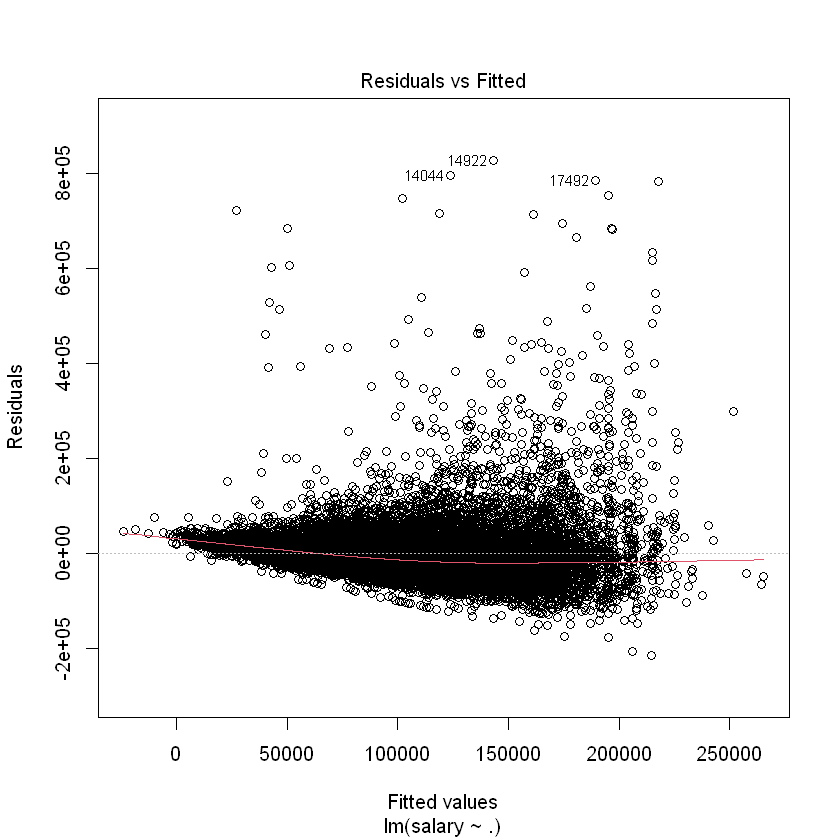

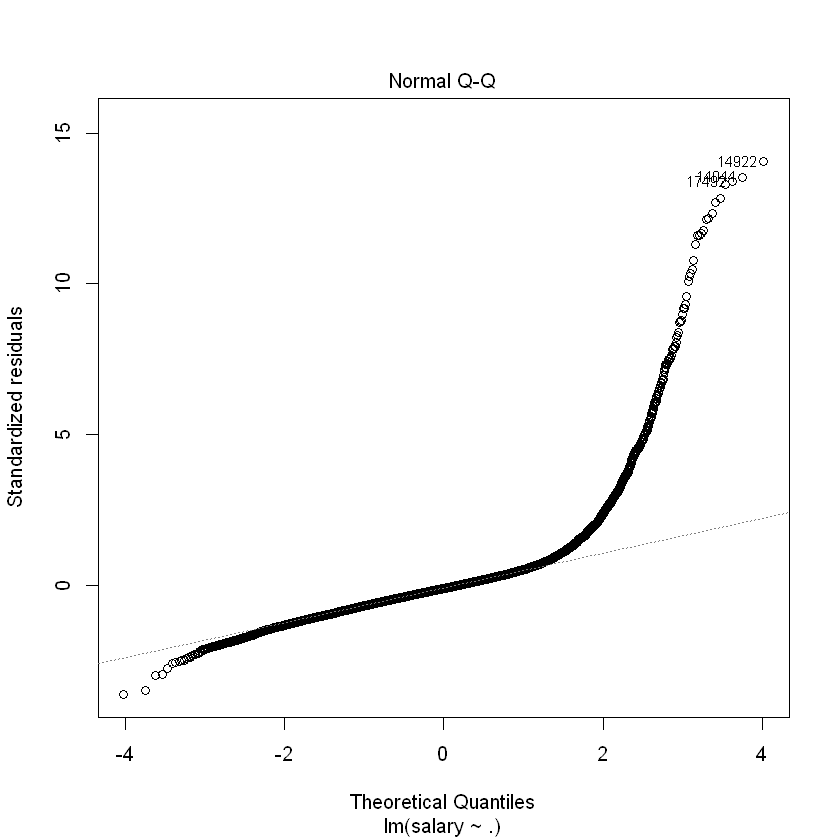

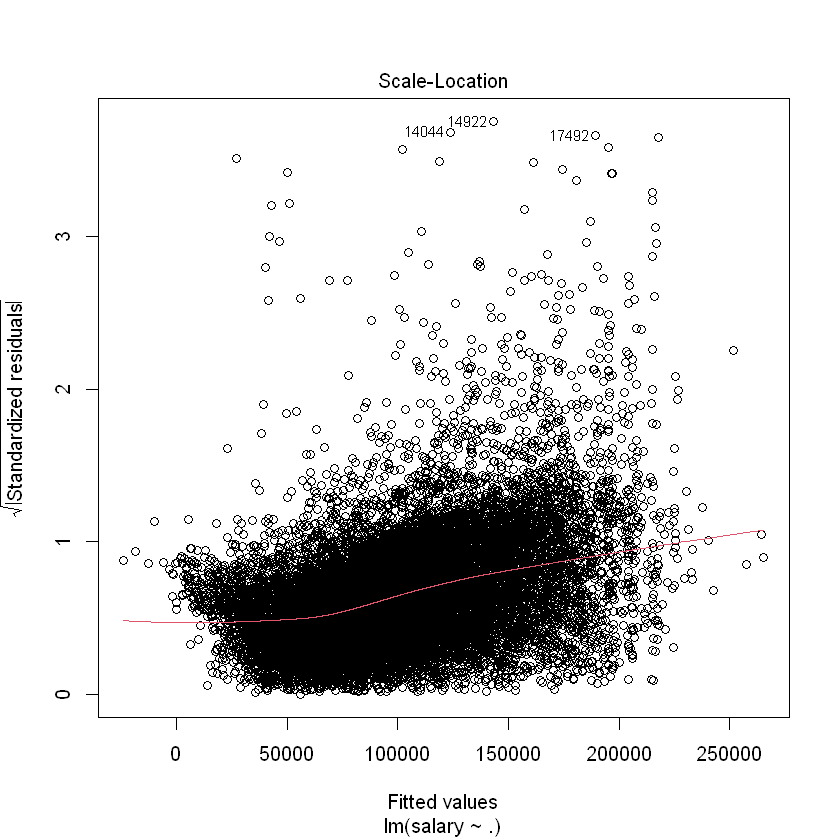

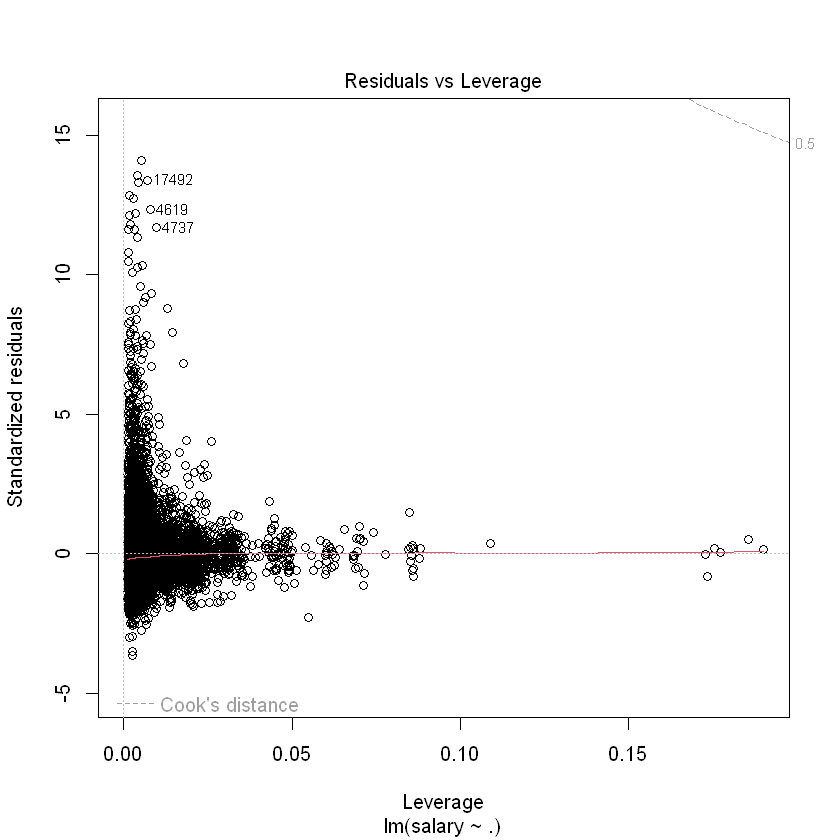

In [46]:
plot(model_linear)

In [47]:
df_reg_ord = data.frame(df_reg)
df_reg_ord$age <- ordered(df_reg_ord$age, levels = c("under 18", "18-24", "25-34", "35-44", "45-54", "55-64", "65 or over"))
df_reg_ord$education_level <- ordered(as.character(df_reg_ord$education_level), levels = c("High School", "Some college", "College degree", "Master's degree", "Professional degree", "PhD"))
df_reg_ord$field_experience_years <- ordered(df_reg_ord$field_experience_years, levels = c("1 year or less", "2 - 4 years", "5 - 7 years", "8 - 10 years", "11 - 20 years", "21 - 30 years", "31 - 40 years", "41 years or more"))
df_reg_ord$overall_experience_years <- ordered(df_reg_ord$overall_experience_years, levels = c("1 year or less", "2 - 4 years", "5 - 7 years", "8 - 10 years", "11 - 20 years", "21 - 30 years", "31 - 40 years", "41 years or more"))
df_reg_ord

,age,industry,state,overall_experience_years,field_experience_years,education_level,gender,race,region,salary
,<ord>,<fct>,<fct>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<dbl>
1,25-34,Education (Higher Education),Massachusetts,5 - 7 years,5 - 7 years,Master's degree,Woman,White,East,55000
2,25-34,"Accounting, Banking & Finance",Tennessee,2 - 4 years,2 - 4 years,College degree,Woman,White,East,34000
3,25-34,Nonprofits,Wisconsin,8 - 10 years,5 - 7 years,College degree,Woman,White,Central,65000
4,25-34,"Accounting, Banking & Finance",South Carolina,8 - 10 years,5 - 7 years,College degree,Woman,White,East,67000
5,25-34,Education (Higher Education),New Hampshire,8 - 10 years,2 - 4 years,Master's degree,Man,White,East,62000
6,25-34,Education (Primary/Secondary),Arizona,5 - 7 years,5 - 7 years,Master's degree,Man,White,West,50000
7,45-54,Computing or Tech,Missouri,21 - 30 years,21 - 30 years,College degree,Woman,White,Central,122000
8,35-44,"Accounting, Banking & Finance",Florida,21 - 30 years,21 - 30 years,College degree,Woman,Hispanic,East,45000
9,35-44,Education (Higher Education),Pennsylvania,11 - 20 years,5 - 7 years,PhD,Woman,Hispanic,East,62000


In [48]:
model_linear_ord <- lm(salary ~ ., data=df_reg_ord)
summary(model_linear_ord)


Call:
lm(formula = salary ~ ., data = df_reg_ord)

Residuals:
    Min      1Q  Median      3Q     Max 
-214078  -29201   -6624   16662  826668 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  126797.03    7919.07  16.012
age.L                                        -20277.03   14649.47  -1.384
age.Q                                          4778.53   14104.06   0.339
age.C                                         -3563.17   10554.04  -0.338
age^4                                         11022.07    6508.54   1.693
age^5                                         -2948.30    3310.34  -0.891
age^6                                          1424.81    1458.17   0.977
industryAgriculture or Forestry              -26395.20    6845.56  -3.856
industryArt & Design                         -29002.03    4255.38  -6.815
industryBusiness or Consulting                 5601.87    3

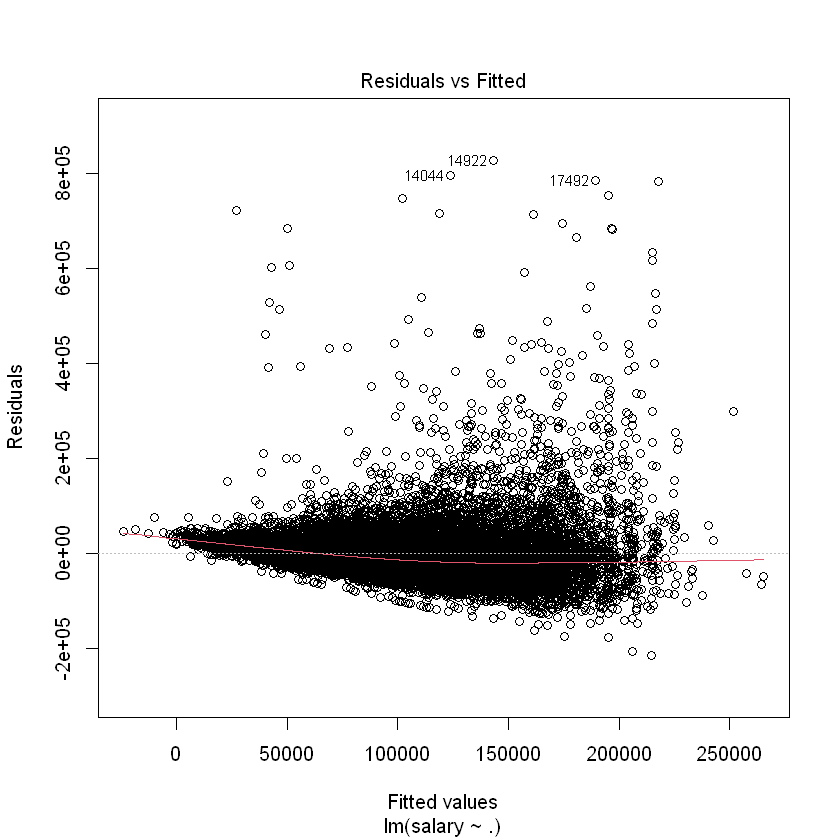

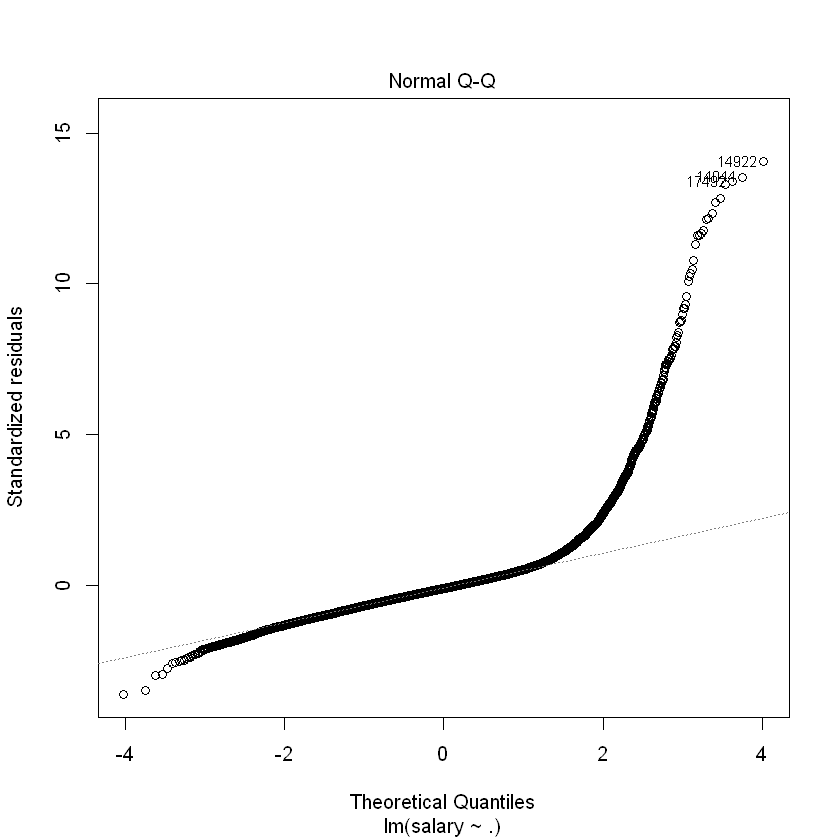

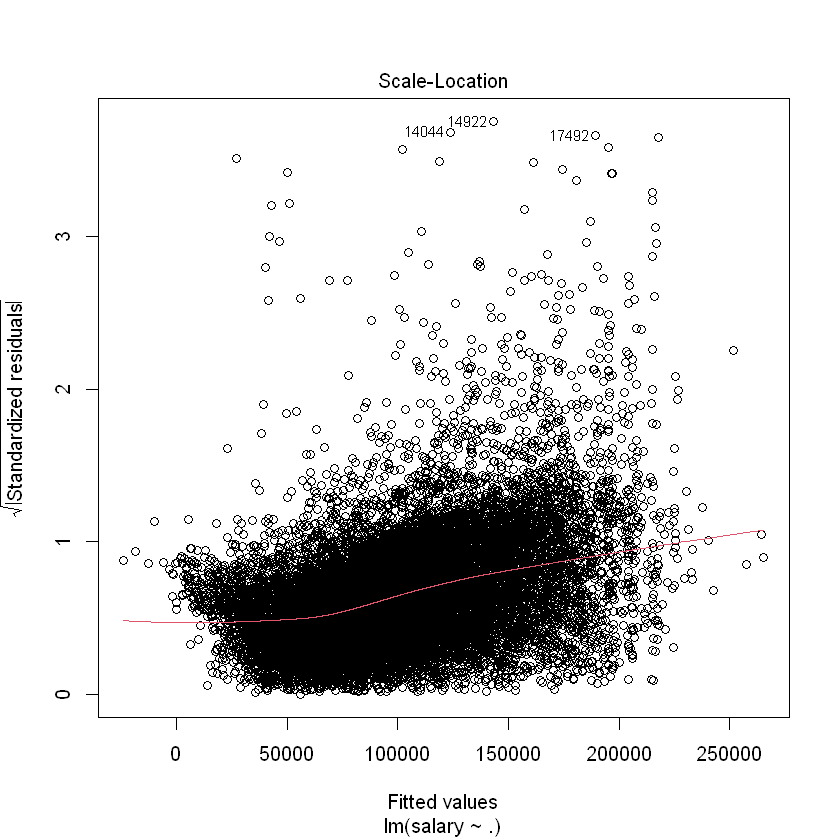

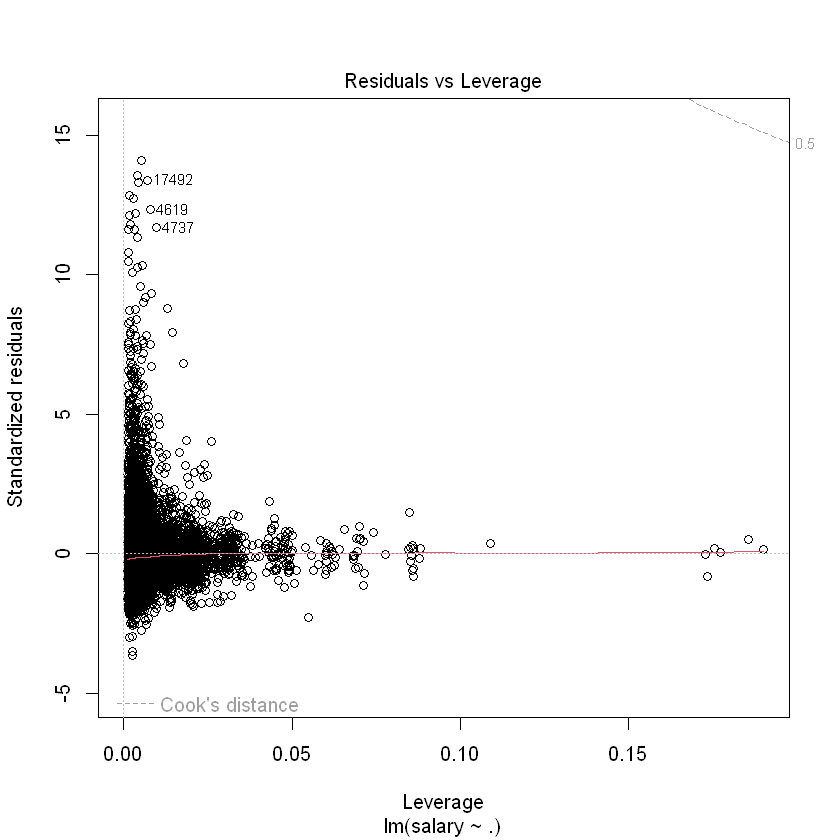

In [49]:
plot(model_linear_ord)

In [50]:
table(df_reg$gender)


  Man Woman 
 3325 13879 

In [51]:
log_model <- lm(log(salary + 1) ~ ., data=df_reg)
summary(log_model)


Call:
lm(formula = log(salary + 1) ~ ., data = df_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9059  -0.2349   0.0080   0.2469   2.9367 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  11.000034   0.069552 158.156
age25-34                                      0.100849   0.024887   4.052
age35-44                                      0.080090   0.027864   2.874
age45-54                                      0.007200   0.032049   0.225
age55-64                                     -0.081519   0.040497  -2.013
age65 or over                                -0.008262   0.080096  -0.103
ageunder 18                                   0.229930   0.217866   1.055
industryAgriculture or Forestry              -0.334557   0.061125  -5.473
industryArt & Design                         -0.253822   0.037997  -6.680
industryBusiness or Consulting              

In [52]:
log_model_summary <- summary(log_model)

coefficients <- log_model_summary$coefficients[, "Estimate"]

factor_columns <- names(df_reg)[sapply(df_reg, is.factor)]

interpretation <- lapply(names(coefficients), function(coef_name) {
  coef_value <- coefficients[coef_name]

  if (coef_name == "(Intercept)") {
    return(paste("Intercept (Baseline annual_salary when all predictors are zero or at reference levels):", exp(coef_value)))
  } else if (coef_name %in% factor_columns || any(grepl(paste0(factor_columns, collapse="|"), coef_name))) {
    return(paste("For the", coef_name, "category, the annual_salary is expected to be", 100 * (exp(coef_value) - 1), "percent higher (or lower if negative) than the reference category, holding all else constant."))
  } else {
    return(paste("For a one-unit increase in", coef_name, ", the log-annual_salary is expected to change by", 100 * coef_value, "percent, holding all else constant."))
  }
})
interpretation


[[1]]
[1] "Intercept (Baseline annual_salary when all predictors are zero or at reference levels): 59876.2069584924"

[[2]]
[1] "For the age25-34 category, the annual_salary is expected to be 10.6109474793098 percent higher (or lower if negative) than the reference category, holding all else constant."

[[3]]
[1] "For the age35-44 category, the annual_salary is expected to be 8.33846783576193 percent higher (or lower if negative) than the reference category, holding all else constant."

[[4]]
[1] "For the age45-54 category, the annual_salary is expected to be 0.722617489789679 percent higher (or lower if negative) than the reference category, holding all else constant."

[[5]]
[1] "For the age55-64 category, the annual_salary is expected to be -7.82845409936636 percent higher (or lower if negative) than the reference category, holding all else constant."

[[6]]
[1] "For the age65 or over category, the annual_salary is expected to be -0.822817531014663 percent higher (or lower if negative) than the reference category, holding all else constant."

[[7]]
[1] "For the ageunder 18 category, the annual_salary is expected to be 25.8512300788745 percent higher (or lower if negative) than the reference category, holding all else constant."

[[8]]
[1] "For the industryAgriculture or Forestry category, the annual_salary is expected to be -28.4345199502577 percent higher (or lower if negative) than the reference category, holding all else constant."

[[9]]
[1] "For the industryArt & Design category, the annual_salary is expected to be -22.4169845163106 percent higher (or lower if negative) than the reference category, holding all else constant."

[[10]]
[1] "For the industryBusiness or Consulting category, the annual_salary is expected to be 7.41582369769824 percent higher (or lower if negative) than the reference category, holding all else constant."

[[11]]
[1] "For the industryComputing or Tech category, the annual_salary is expected to be 30.0683535411193 percent higher (or lower if negative) than the reference category, holding all else constant."

[[12]]
[1] "For the industryEducation (Higher Education) category, the annual_salary is expected to be -37.2967262728181 percent higher (or lower if negative) than the reference category, holding all else constant."

[[13]]
[1] "For the industryEducation (Primary/Secondary) category, the annual_salary is expected to be -43.1098212248941 percent higher (or lower if negative) than the reference category, holding all else constant."

[[14]]
[1] "For the industryEngineering or Manufacturing category, the annual_salary is expected to be 5.37126348694337 percent higher (or lower if negative) than the reference category, holding all else constant."

[[15]]
[1] "For the industryEntertainment category, the annual_salary is expected to be -17.6665660692871 percent higher (or lower if negative) than the reference category, holding all else constant."

[[16]]
[1] "For the industryGovernment and Public Administration category, the annual_salary is expected to be -24.5710682181149 percent higher (or lower if negative) than the reference category, holding all else constant."

[[17]]
[1] "For the industryHealth care category, the annual_salary is expected to be -12.4074555890325 percent higher (or lower if negative) than the reference category, holding all else constant."

[[18]]
[1] "For the industryHospitality & Events category, the annual_salary is expected to be -26.548128252384 percent higher (or lower if negative) than the reference category, holding all else constant."

[[19]]
[1] "For the industryInsurance category, the annual_salary is expected to be -1.71580931277709 percent higher (or lower if negative) than the reference category, holding all else constant."

[[20]]
[1] "For the industryLaw category, the annual_salary is expected to be -12.6032200963787 percent higher (or lower if negative) than the reference category, holding all else constant."

[[21]]
[1] "For the industryLaw Enforcement & 

In [53]:
sapply(df_reg[, sapply(df_reg, is.factor)], function(x) levels(x)[1])

age                        industry 
                        "18-24" "Accounting, Banking & Finance" 
                          state        overall_experience_years 
                      "Alabama"                "1 year or less" 
         field_experience_years                 education_level 
               "1 year or less"                "College degree" 
                         gender                            race 
                          "Man"       "Asian or Asian American" 
                         region 
                      "Central"

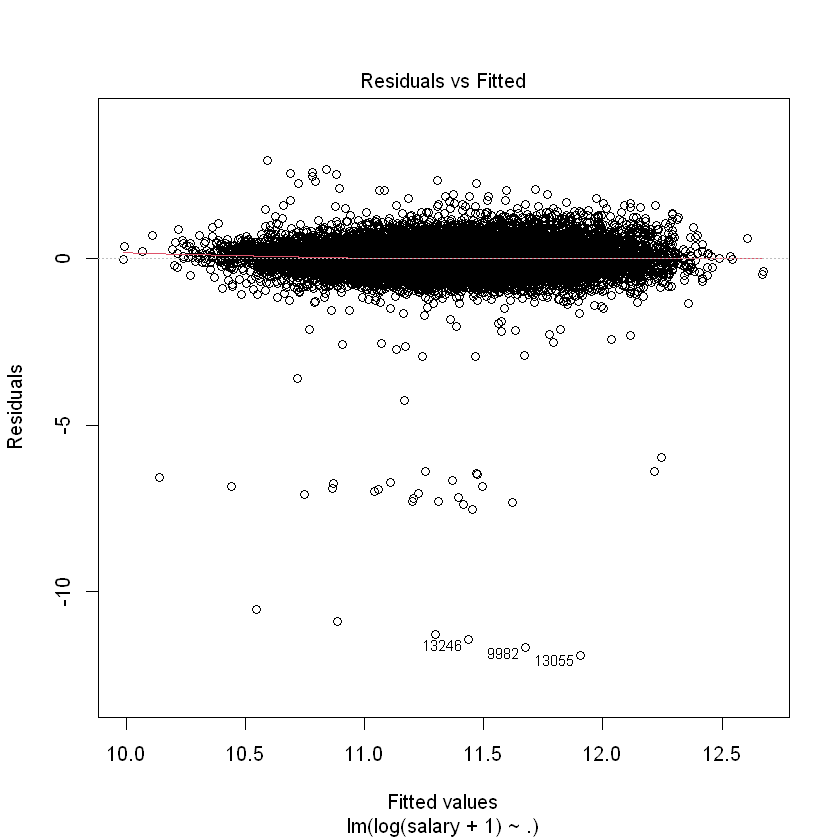

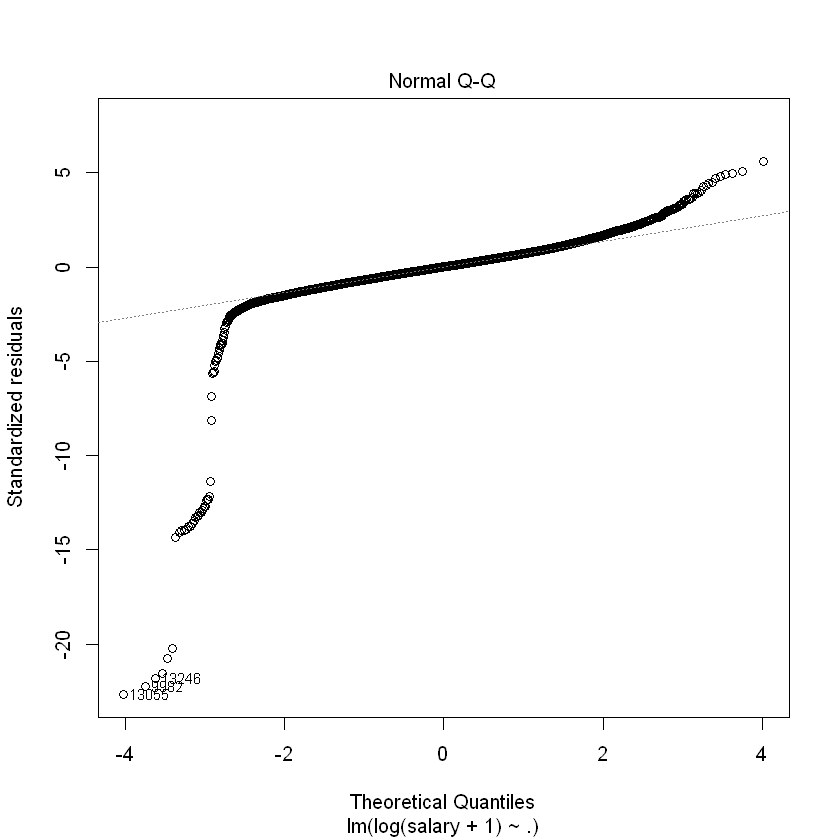

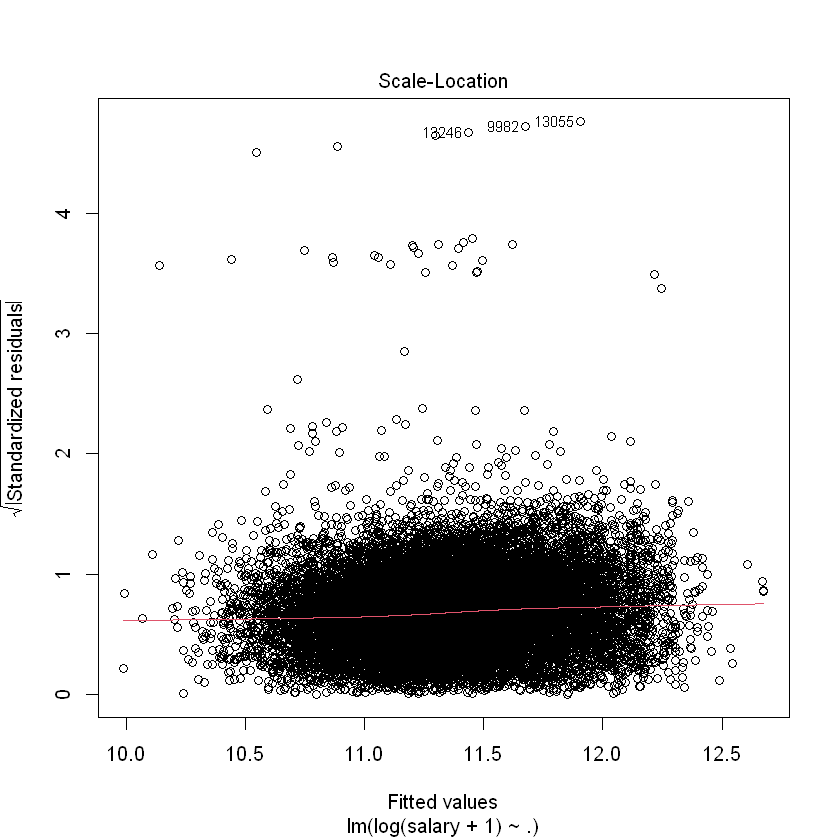

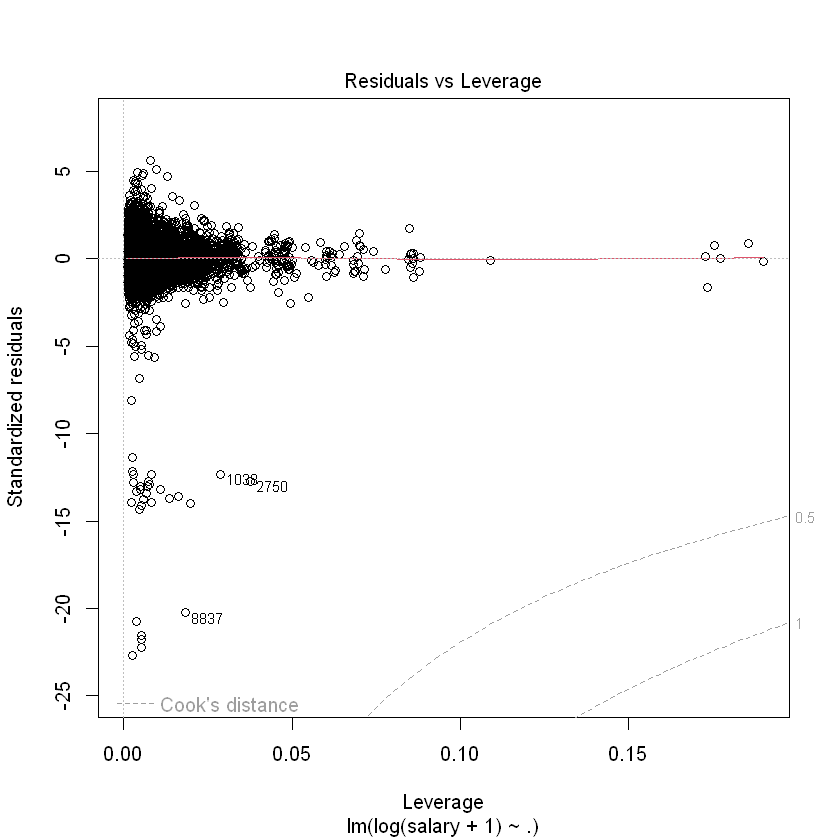

In [54]:
plot(log_model)

In [55]:
model_log_ord <- lm(log(salary + 1) ~ ., data=df_reg_ord)
# summary(model_log_ord)

In [56]:
names(df_reg)

[1] "age"                      "industry"                
 [3] "state"                    "overall_experience_years"
 [5] "field_experience_years"   "education_level"         
 [7] "gender"                   "race"                    
 [9] "region"                   "salary"

In [57]:
df_reg_new <- df_reg[ , !(names(df_reg) %in% c('region'))]
log_model <- lm(log(salary + 1) ~ ., data=df_reg_new)
summary(log_model)


Call:
lm(formula = log(salary + 1) ~ ., data = df_reg_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9059  -0.2349   0.0080   0.2469   2.9367 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  11.000034   0.069552 158.156
age25-34                                      0.100849   0.024887   4.052
age35-44                                      0.080090   0.027864   2.874
age45-54                                      0.007200   0.032049   0.225
age55-64                                     -0.081519   0.040497  -2.013
age65 or over                                -0.008262   0.080096  -0.103
ageunder 18                                   0.229930   0.217866   1.055
industryAgriculture or Forestry              -0.334557   0.061125  -5.473
industryArt & Design                         -0.253822   0.037997  -6.680
industryBusiness or Consulting                0.071537   0.027200   2.630
industr

In [58]:
# cor_matrix <- cor(select(df_reg, where(is.numeric)))

In [59]:
library(car)
# library(broom)

# Calculate VIFs for each predictor
vifs <- vif(log_model)
print(vifs)

vif_threshold <- 5

high_vif_vars <- names(vifs[vifs > vif_threshold])
print(high_vif_vars)

                              GVIF Df GVIF^(1/(2*Df))
age                      12.360652  6        1.233115
industry                  2.711259 25        1.020149
state                     1.569201 50        1.004516
overall_experience_years 46.318795  7        1.315172
field_experience_years   14.314570  7        1.209360
education_level           2.017246  5        1.072694
gender                    1.125120  1        1.060717
race                      1.154427  5        1.014464
NULL


In [60]:
# looks like age, overall experience years and field experiences have highest multicollinearity
# should consider choosing one of those, we opt with field experience as it seems the most relevant
# in predicting salary given a certain industry/field
df_reg <- df_reg[ , !(names(df_reg) %in% c('overall_experience_years', 'age'))]

In [61]:
# removing those features overall_experience_years and age
# haven't increased the adjusted r-squared by much
# we know the r-squared would never decrease by adding
# new features so we rely on the adjusted r-squared
log_model_fil <- lm(log(salary + 1) ~ ., data=df_reg)
summary(log_model_fil)


Call:
lm(formula = log(salary + 1) ~ ., data = df_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8972  -0.2366   0.0069   0.2474   2.9032 

Coefficients: (2 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                  11.032122   0.064587 170.809
industryAgriculture or Forestry              -0.326690   0.061352  -5.325
industryArt & Design                         -0.248763   0.038130  -6.524
industryBusiness or Consulting                0.070450   0.027304   2.580
industryComputing or Tech                     0.269426   0.018741  14.376
industryEducation (Higher Education)         -0.467910   0.020768 -22.530
industryEducation (Primary/Secondary)        -0.566389   0.026840 -21.102
industryEngineering or Manufacturing          0.048149   0.022448   2.145
industryEntertainment                        -0.190925   0.044026  -4.337
industryGovernment and Public Administration

In [62]:
# direction "both" does both backward elimination and forward selection
stepwise_model <- stepAIC(log_model, direction = "both", trace = FALSE)
summary(stepwise_model)


Call:
lm(formula = log(salary + 1) ~ age + industry + state + overall_experience_years + 
    field_experience_years + education_level + gender + race, 
    data = df_reg_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9059  -0.2349   0.0080   0.2469   2.9367 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  11.000034   0.069552 158.156
age25-34                                      0.100849   0.024887   4.052
age35-44                                      0.080090   0.027864   2.874
age45-54                                      0.007200   0.032049   0.225
age55-64                                     -0.081519   0.040497  -2.013
age65 or over                                -0.008262   0.080096  -0.103
ageunder 18                                   0.229930   0.217866   1.055
industryAgriculture or Forestry              -0.334557   0.061125  -5.473
industryArt & Design                  

In [63]:
# The stepwise regression didn't remove any feature
# This means that removing a feature wasn't conducive to
# a better performance, and that each feature is important
# in predicting salary
original_vars <- names(coef(log_model))
stepwise_vars <- names(coef(stepwise_model))
removed_vars <- setdiff(original_vars, stepwise_vars)
print(removed_vars)

character(0)


[1] 440


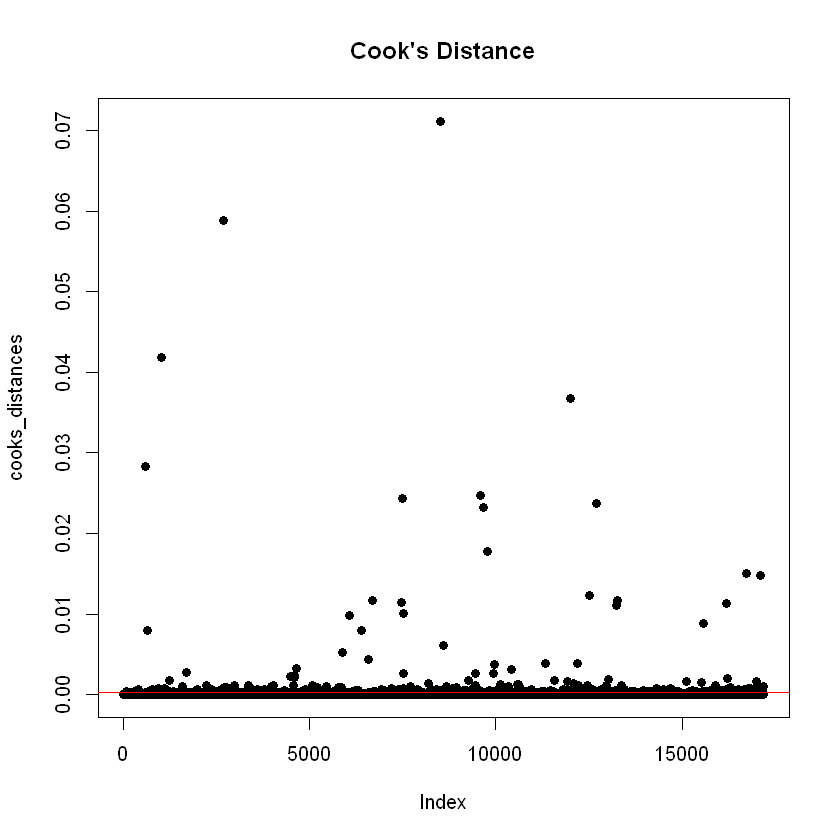

In [64]:
# Calculate Cook's Distance
cooks_distances <- cooks.distance(log_model)

plot(cooks_distances, pch=20, cex=1.5, main="Cook's Distance")
abline(h = 4 / length(cooks_distances), col = "red")

cooks_threshold <- 4 / length(cooks_distances)
outliers <- which(cooks_distances > cooks_threshold)
print(length(outliers))

In [65]:
# the predictors need to be in a matrix format.
# the response variable should be a vector.
# categorical variables are appropriately encoded.
X <- model.matrix(log(salary + 1) ~ . - 1, data = df_reg) # -1 to exclude the intercept
y <- log(df_reg$salary + 1)

In [66]:
# Setting up cross-validation for Lasso Regression
# this is in order to have a more robust estimate
# It’s a good practice to validate the selected model using cross-validation or
# out-of-sample testing to ensure that the model performs well on unseen data.
fit_and_evaluate_model <- function(X, y) {

  cv_fit <- cv.glmnet(X, y, alpha = 1) # ElasticNet balance between Ridge and Lasso

  # Best lambda value
  best_lambda <- cv_fit$lambda.min

  final_model <- glmnet(X, y, alpha = 1, lambda = best_lambda)
  predictions <- predict(final_model, newx = X, s = best_lambda)

  rmse <- sqrt(mean((y - predictions)^2))
  print(paste("RMSE:", rmse))
  SST <- sum((y - mean(y))^2)
  SSR <- sum((predictions - mean(y))^2)
  r_squared <- SSR / SST
  print(paste("R-squared:", r_squared))
  return(list(final_model = final_model, best_lambda = best_lambda, r_squared=r_squared))
}

fit_and_evaluate_model(X, y)

[1] "RMSE: 0.526607736646588"
[1] "R-squared: 0.33267346725615"


$final_model

Call:  glmnet(x = X, y = y, alpha = 1, lambda = best_lambda) 

  Df  %Dev    Lambda
1 95 33.48 0.0001509

$best_lambda
[1] 0.0001509316

$r_squared
[1] 0.3326735


In [67]:
# check model performance on removing high leverage points
# to ensure we don't overfit given high cardinality
# we regularize using Lasso as well as cross validate

# Removing outliers involves excluding them from the dataset and refitting the model.
# This can be appropriate if the outliers are deemed as errors or non-representative of the general population.
df_reg_no_outliers <- df_reg[-outliers, ]

X <- model.matrix(log(salary + 1) ~ . - 1, data = df_reg_no_outliers) # -1 to exclude the intercept
y <- log(df_reg_no_outliers$salary + 1)
output = fit_and_evaluate_model(X, y)
# log_model_no_outliers <- lm(log(salary + 1) ~ ., data = df_reg_no_outliers)
# summary(log_model_no_outliers)

[1] "RMSE: 0.368696809115317"
[1] "R-squared: 0.505022690154519"


In [68]:
# Imputing outliers involves replacing them with more representative values. One common method is median imputation, where outliers are replaced with the median of the non-outlier values.
# This approach can be be the outliers are believed to be genuine but extreme values.

# check model performance on imputing high leverage points
# bases on IQR method.
# to ensure we don't overfit given high cardinality
# we regularize using Lasso as well as cross validate


df_reg_imputed <- df_reg
for (col in names(df_reg)) {
    if (is.numeric(df_reg[[col]])) {
        median_val <- median(df_reg[[col]], na.rm = TRUE)
        df_reg_imputed[[col]][outliers] <- median_val
    }
}
X <- model.matrix(log(salary + 1) ~ . - 1, data = df_reg_imputed) # -1 to exclude the intercept
y <- log(df_reg_imputed$salary + 1)
result <- fit_and_evaluate_model(X, y)
final_model <- result$final_model
best_lambda <- result$best_lambda
# log_model_imputed <- lm(log(salary + 1) ~ ., data = df_reg_imputed)
# summary(log_model_imputed)

[1] "RMSE: 0.369161392786829"
[1] "R-squared: 0.491257886910102"


In [69]:
# too many feature interactions to consider given high cardinality of many of those features
# Stepwise regression can be a useful tool, but it has limitations.
# It can lead to overfitting, especially with large datasets and many predictors.


# considering all pairwise interactions took too long to run, need other approach
# full_model <- lm(salary ~ .^2, data = df_reg)

# we fit one model per pairwise interaction in order to see
# the statistically significant ones
# we can then combine those pairs in the final model

# 'industry''state'''field_experience_years''education_level''gender''race''region''salary'
column_names <- setdiff(names(df_reg_imputed), "salary")
interaction_pairs <- combn(column_names, 2, simplify = FALSE)
interaction_pairs

[[1]]
[1] "industry" "state"   

[[2]]
[1] "industry"               "field_experience_years"

[[3]]
[1] "industry"        "education_level"

[[4]]
[1] "industry" "gender"  

[[5]]
[1] "industry" "race"    

[[6]]
[1] "industry" "region"  

[[7]]
[1] "state"                  "field_experience_years"

[[8]]
[1] "state"           "education_level"

[[9]]
[1] "state"  "gender"

[[10]]
[1] "state" "race" 

[[11]]
[1] "state"  "region"

[[12]]
[1] "field_experience_years" "education_level"       

[[13]]
[1] "field_experience_years" "gender"                

[[14]]
[1] "field_experience_years" "race"                  

[[15]]
[1] "field_experience_years" "region"                

[[16]]
[1] "education_level" "gender"         

[[17]]
[1] "education_level" "race"           

[[18]]
[1] "education_level" "region"         

[[19]]
[1] "gender" "race"  

[[20]]
[1] "gender" "region"

[[21]]
[1] "race"   "region"

In [70]:
for (pair in interaction_pairs) {
    interaction_term <- paste(pair, collapse = ":")
    formula_str <- paste("log(salary + 1) ~", ".", "+", interaction_term)
    formula <- as.formula(formula_str)
    log_model_fil <- lm(formula, data = df_reg_imputed)
    model_summary <- summary(log_model_fil)
    cat("Interaction between:", paste(pair, collapse = " and "), "\n")
    cat("R-squared:", model_summary$r.squared, "\n")
    cat("Statistically Significant Interaction Coefficients:\n")
    for (coef_name in rownames(model_summary$coefficients)) {
        # Check if coefficient name contains ':'
        if (grepl(":", coef_name)) {
            p_value <- model_summary$coefficients[coef_name, "Pr(>|t|)"]

            if (p_value < 0.05) {  # Threshold for statistical significance
                cat(coef_name, ": Estimate =", model_summary$coefficients[coef_name, "Estimate"],
                    ", p-value =", p_value, "\n")
            }
        }
    }
    cat("\n")
}

Interaction between: industry and state 
R-squared: 0.5311172 
Statistically Significant Interaction Coefficients:
industryGovernment and Public Administration:stateArizona : Estimate = -0.5710582 , p-value = 0.03945956 
industryMedia & Digital:stateArizona : Estimate = -0.7417561 , p-value = 0.04036968 
industryEducation (Higher Education):stateCalifornia : Estimate = -0.3635989 , p-value = 0.01418409 
industryEducation (Higher Education):stateDistrict of Columbia : Estimate = -0.5198883 , p-value = 0.003087971 
industryEngineering or Manufacturing:stateDistrict of Columbia : Estimate = -0.4643504 , p-value = 0.04136598 
industryEducation (Higher Education):stateFlorida : Estimate = -0.3359146 , p-value = 0.03749768 
industryGovernment and Public Administration:stateFlorida : Estimate = -0.527304 , p-value = 0.03985751 
industryEducation (Higher Education):stateGeorgia : Estimate = -0.6117702 , p-value = 0.0003363213 
industryEngineering or Manufacturing:stateGeorgia : Estimate = -0.5

### Industry Interactions:
#### State-Specific Trends:
- **Negative Impact:**
  - Certain industries, when combined with specific states, show a statistically significant negative impact on salary. Examples include:
    - `Government and Public Administration` in `Arizona`
    - `Education (Higher Education)` in `California`
    - `Engineering or Manufacturing` in `District of Columbia`
  - **Positive Exceptions:**
    - The `Insurance` industry in `Idaho` shows a positive impact on salary.

#### Field Experience Years:
- **Negative Impact:**
  - Having `11-20 years` of field experience generally leads to a decrease in salary across various industries, especially in `Education (Primary/Secondary)`, `Entertainment`, and `Social Work`.
  - **Exceptions:** This negative impact is less evident in the early career stages (`2-4 years` of experience) and becomes more pronounced with increasing experience.

### Education Level Interactions:
#### Master's Degree:
- **Generally Negative:**
  - Holding a Master's degree is often negatively correlated with salary across various industries, particularly in `Business or Consulting`, `Computing or Tech`, and `Marketing, Advertising & PR`.
  - **Region-Specific Impact:** Having a Master's degree and being in the `East` region shows a slight negative correlation with salary.

#### Professional Degree:
- **State-Specific Negative Correlation:**
  - Obtaining a Professional degree in states like `Iowa`, `Oregon`, and `Wisconsin` is associated with lower salaries.

### Gender Interactions:
#### Women in Industry:
- **Generally Positive:**
  - Being a woman correlates positively with salary in industries like `Art & Design`, `Education (Primary/Secondary)`, and `Marketing, Advertising & PR`.

### Race Interactions:
#### Hispanic Race:
- **Positive in Certain Industries:**
  - Being Hispanic positively correlates with salary in `Education (Higher Education)`, `Media & Digital`, and `Nonprofits`.
  - **Region Specific:** Hispanic race in the `East` region shows a positive correlation with salary.

### Region Interactions:
#### East Region:
- **Negative for Retail and Sales:**
  - Working in `Retail` and `Sales` industries in the `East` region is associated with lower salaries.
  - **Positive for Art & Design in West:** Conversely, being in the `West` region has a positive impact on salaries in `Art & Design` and `Computing or Tech` industries.

### Overall Insights:
- **Experience Saturation in Certain Industries:**
  - Increased field experience years, particularly `11-20 years`, are negatively correlated with salary in several industries, suggesting a potential undervaluation of long-term experience in these fields.
- **Educational Attainment and Region Impact:**
  - The impact of educational level on salary varies significantly by industry and region, with higher degrees not always correlating with higher salaries, especially in certain states.
- **Gender and Racial Impacts:**
  - Gender and race show significant interactions with industry and region, indicating systemic factors at play in salary determinations.


We end up choosing 3 interaction pairs that are most significant both intuitively/qualitatively as well as quantitatively (based on the above):

**Industry & State**: the industry's impact on salary can vary significantly across different states due to regional economic differences, cost of living, and state-specific industry strengths.

**Industry & Years of Experience in Field:** The interaction between industry and field experience is likely to be significant because the value of experience can vary greatly depending on the industry. Some industries might reward experience more than others.

**Industry & Education Level:** Similar to field experience, the impact of education on salary is expected to vary across industries. Some industries might place a higher premium on advanced educational qualifications.

**State & Education Level:** The value of education in salary determination could vary by state, influenced by local demand for certain qualifications and the presence of industries that value those qualifications.

**Industry & Gender/Race:** Those could be reflecting how salary disparities might manifest at the intersection of industry with gender or race.

In [71]:
# Above we find that the interactions that yield the most
# statistically significant factors for the ineraction are
# the following. Each increases the R-squared ever so slightly
# with industry and state interaction yielding the most
# staitstically significant coefficients for the interactions
# as well as an R-squared increase of 0.04!
significant_pairs = list(
  # using region instead of state to avoid too many features
    c("industry", "region"),
    c("industry", "field_experience_years"),
    c("industry", "education_level"),
    c("industry", "gender"),
    c("industry", "race"),
    c("region", "education_level")
)

df_with_interaction <- df_reg_imputed
for (pair in significant_pairs) {
    interaction_name <- paste(pair, collapse = "_")
    df_with_interaction[[interaction_name]] <- interaction(df_with_interaction[[pair[1]]], df_with_interaction[[pair[2]]])
}
head(df_with_interaction)

,industry,state,field_experience_years,education_level,gender,race,region,salary,industry_region,industry_field_experience_years,industry_education_level,industry_gender,industry_race,region_education_level
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Education (Higher Education),Massachusetts,5 - 7 years,Master's degree,Woman,White,East,55000,Education (Higher Education).East,Education (Higher Education).5 - 7 years,Education (Higher Education).Master's degree,Education (Higher Education).Woman,Education (Higher Education).White,East.Master's degree
2,"Accounting, Banking & Finance",Tennessee,2 - 4 years,College degree,Woman,White,East,34000,"Accounting, Banking & Finance.East","Accounting, Banking & Finance.2 - 4 years","Accounting, Banking & Finance.College degree","Accounting, Banking & Finance.Woman","Accounting, Banking & Finance.White",East.College degree
3,Nonprofits,Wisconsin,5 - 7 years,College degree,Woman,White,Central,65000,Nonprofits.Central,Nonprofits.5 - 7 years,Nonprofits.College degree,Nonprofits.Woman,Nonprofits.White,Central.College degree
4,"Accounting, Banking & Finance",South Carolina,5 - 7 years,College degree,Woman,White,East,67000,"Accounting, Banking & Finance.East","Accounting, Banking & Finance.5 - 7 years","Accounting, Banking & Finance.College degree","Accounting, Banking & Finance.Woman","Accounting, Banking & Finance.White",East.College degree
5,Education (Higher Education),New Hampshire,2 - 4 years,Master's degree,Man,White,East,62000,Education (Higher Education).East,Education (Higher Education).2 - 4 years,Education (Higher Education).Master's degree,Education (Higher Education).Man,Education (Higher Education).White,East.Master's degree
6,Education (Primary/Secondary),Arizona,5 - 7 years,Master's degree,Man,White,West,50000,Education (Primary/Secondary).West,Education (Primary/Secondary).5 - 7 years,Education (Primary/Secondary).Master's degree,Education (Primary/Secondary).Man,Education (Primary/Secondary).White,West.Master's degree


In [72]:
# full_model <- lm(log(salary + 1) ~ ., data = df_with_interaction)
# stepwise_model <- stepAIC(full_model, direction = "both", trace = FALSE)
# summary(stepwise_model)

In [73]:
# full_model_vars <- names(coef(full_model))
# stepwise_model_vars <- names(coef(stepwise_model))
# removed_vars <- setdiff(full_model_vars, stepwise_model_vars)
# print("Variables removed by stepwise regression:")
# print(removed_vars)

In [74]:
# lets now fit our final model
# to avoid overfitting we'll
# perform feature selection
# as well as regularization and cross validation

# Remove the non-significant variables
df_final <- df_with_interaction # [ , !(names(df_with_interaction) %in% removed_vars)]

X <- model.matrix(~ . - 1, data = df_final)  # -1 to exclude the intercept
y <- log(df_final$salary + 1)
final_model_results <- fit_and_evaluate_model(X, y)
final_model <- final_model_results$final_model
best_lambda <- final_model_results$best_lambda
# we have r-squared of 0.86 likely overfit but we dealt
# with it with regularization and cross val
# more advanced could be applying PCA.

[1] "RMSE: 0.184015459008163"
[1] "R-squared: 0.864277207926994"


In [75]:
coefficients <- coef(final_model, s = best_lambda)
coefficients

760 x 1 sparse Matrix of class "dgCMatrix"
                                                                                                s1
(Intercept)                                                                           1.067203e+01
industryAccounting, Banking & Finance                                                 .           
industryAgriculture or Forestry                                                       .           
industryArt & Design                                                                  .           
industryBusiness or Consulting                                                        6.827371e-02
industryComputing or Tech                                                             .           
industryEducation (Higher Education)                                                 -4.062474e-02
industryEducation (Primary/Secondary)                                                -8.384050e-03
industryEngineering or Manufacturing                              

### Industry Insights
- **Accounting, Banking & Finance**: No significant direct impact noted, but interactions with state and education level show variations in salary influence.
- **Computing or Tech**: Notable for its absence of a direct impact but shows significance in interactions with state and experience years.
- **Education (Higher Education)**: Generally, a negative influence on salary, especially when combined with region.
- **Engineering or Manufacturing**: Positive influence, especially in Central regions.
- **Entertainment and Hospitality & Events**: Negative impact when combined with certain regions and experience levels.
- **Government and Public Administration**: Mixed impact based on region and experience.
- **Health care**: Notable for its absence of direct impact, but shows varied influence based on state and race.
- **Marketing, Advertising & PR, Media & Digital**: Some positive impacts in specific regional interactions.
- **Nonprofits**: Generally, a negative influence, especially in certain regions and for specific experience levels.
- **Social Work**: Consistently negative impact across various categories.

### State Insights
- **California, District of Columbia, Massachusetts, New York**: Positive influence on salary.
- **States like Arkansas, Kentucky, Louisiana, Maine, Montana, Oklahoma, South Carolina, West Virginia**: Negative influence on salary.
- **Others**: Mixed or no significant impact, with nuances depending on industry, experience, and education level.

### Experience Insights
- **11-20 years, 21-30 years, 31-40 years, 41 years or more**: Positive impact on salary, with increasing influence for higher experience brackets.
- **5-7 years, 8-10 years**: Smaller positive impact.

### Education Level Insights
- **Master's degree, PhD, Professional degree**: Positive influence on salary.
- **High School, Some college**: Negative impact, especially notable in specific industries and states.

### Gender and Race Insights
- **Women**: Negative impact in specific industries like Computing or Tech, Higher Education, and Nonprofits.
- **Asian or Asian American**: Positive impact in specific industries like Hospitality & Events, Marketing, Advertising & PR, Media & Digital.
- **Black or African American**: Mixed impact; positive in industries like Entertainment and Sales, negative in others like Accounting, Banking & Finance, Higher Education.
- **Hispanic**: Negative impact in Agriculture or Forestry, positive in Government and Public Administration, Media & Digital.
- **Middle Eastern or Northern African**: Negative impact in Government and Public Administration, Health care; positive in Law.
- **Native American or Alaska Native**: Negative impact in Education (Primary/Secondary), Social Work; positive in Law, Health care.
- **White**: Negative impact in Education (Primary/Secondary), Retail; positive in Insurance.

### Regional Interactions with Education
- **Central region**: Negative impact for High School level, positive for PhD and Professional degree.
- **East region**: Negative impact for High School, positive for PhD.
- **West region**: Positive impact for Professional degree.


In [76]:
summary(final_model)

          Length Class     Mode   
a0          1    -none-    numeric
beta      759    dgCMatrix S4     
df          1    -none-    numeric
dim         2    -none-    numeric
lambda      1    -none-    numeric
dev.ratio   1    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

In [77]:
factor_columns <- names(df_reg_imputed)[sapply(df_reg_imputed, is.factor)]
reference_categories <- data.frame(Variable = character(), ReferenceCategory = character(), stringsAsFactors = FALSE)
for (factor_column in factor_columns) {
  ref_category <- levels(df_reg_imputed[[factor_column]])[1]  # Get the first level
  reference_categories <- rbind(reference_categories, data.frame(Variable = factor_column, ReferenceCategory = ref_category))
}
reference_categories


Variable,ReferenceCategory
<chr>,<chr>
industry,"Accounting, Banking & Finance"
state,Alabama
field_experience_years,1 year or less
education_level,College degree
gender,Man
race,Asian or Asian American
region,Central


Below the baseline salary is $43,052.05. It represents the record for the reference categories found above. Each record below means the percentage change (higher or lower) relative to that baseline.

In [78]:
model_coefficients <- coef(final_model, s = best_lambda)
coef_matrix <- as.matrix(model_coefficients)
coef_df <- data.frame(Variable = rownames(coef_matrix), Coefficient = coef_matrix[, 1])
coef_df <- coef_df[coef_df$Coefficient != 0,]


interpretations <- data.frame(Variable = character(), Salary_Percentage_Change = numeric(), stringsAsFactors = FALSE)

for (i in 1:nrow(coef_df)) {
  coef_name <- as.character(coef_df$Variable[i])
  coef_value <- coef_df$Coefficient[i]
  if (coef_name == "(Intercept)") {
    cat("Baseline salary considering reference categories:", exp(coef_value))
  }
  else {
  interpretations <- rbind(interpretations, data.frame(Variable = coef_name, Salary_Percentage_Change = 100 * (exp(coef_value) - 1)))
  }
}

# below we see the interpretations
interpretations_sorted <- interpretations[order(interpretations$Salary_Percentage_Change, decreasing = TRUE), ]
top_20 <- head(interpretations_sorted, 20)
bottom_20 <- tail(interpretations_sorted, 20)
top_bottom_20 <- rbind(top_20, bottom_20)
top_bottom_20


Baseline salary considering reference categories: 43132.34

,Variable,Salary_Percentage_Change
,<chr>,<dbl>
186,industry_field_experience_yearsHospitality & Events.41 years or more,20.257701
55,field_experience_years41 years or more,18.171056
53,field_experience_years21 - 30 years,17.062373
54,field_experience_years31 - 40 years,16.061963
272,industry_education_levelEntertainment.Professional degree,15.598117
52,field_experience_years11 - 20 years,13.879455
262,industry_education_levelEntertainment.PhD,13.760151
236,"industry_education_levelMarketing, Advertising & PR.High School",10.549259
311,industry_raceHospitality & Events.Asian or Asian American,10.176606
